# Logistic Regression

The following is a simple, raw implementation of the logistic regression model. This project uses the [Breast Cancer Wisconsin (Diagnostic) Data Set](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)), which has been integrated into the *datasets* module of the [scikit-learn](https://scikit-learn.org/stable/) machine learning library, to train and test the custom-built logistic regression model. The following are the formulas I used to help me build this model.

Let $n$ and $N$ be the number of features and the number of samples, respectively.

let $b$ and $w$ be the `intercept_` and the `coef_`, respectively

$$z=b+\sum_{i=1}^nw_ix_i$$

This equation gives us a linear estimator of the probability of the outcome being classified as either 1 or 0, or in this case, M (malignant) or B (benign). However, this estimation has two defects; 1. it has a constant gradient (derivative), 2. it isn't bounded between 1 and 0. We must make it so that our probability represents a realistic estimate. Therefore, we must plug this result into the following formula:

$$\hat y=\frac{1}{1+e^{-z}}$$

This is the sigmoid function. This function is bounded between 1 and 0, which would accurately represent reality since probabilities can only range from 0 to 1. Instead of having a constant derivative, as in the linear estimator, the gradient becomes variable. When the probability is 0.5, the rate of change of the probability with respect to all the features is maximum (i.e derivative is maximum). When the probability is closer to either 1 or 0, the derivative decreases.

The following equations represent the process of gradient descent, where we minimize the cost that is resulted from all the values of the coefficients. $D_b$ represents the derivative of $b$ and $D_w$ represents the derivative of each $w$.

$$D_b=\frac{1}{N}\sum_{i=1}^n(\hat y-y_i)$$

$$D_w=\frac{1}{N}\sum_{i=1}^nx_i(\hat y-y_i)$$

Let $l$ be the learning rate of the model. We can update the coefficients (each $w$ and the $b$) with the following formulas:

$$b=b-l\cdot D_b$$

$$w=w-l\cdot D_w$$

As mentioned, this project implements a standard scaler, as a feature scaling tool. It uses the following formula to scale the data:

$$x_{stand}=\frac{x-\bar x}{\sigma_x}$$

where $\bar x$ is the mean of $x$ and $\sigma_x$ is the standard deviation of $x$.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
class StandardScaler:
  def __init__(self, with_mean=True, with_std=True):
    self.with_mean = with_mean
    self.with_std = with_std
    self._mean = None
    self._std_dev = None
  
  def _mean_func(self, d): return sum(d)/len(d)

  def _std_dev_func(self, d):
    d_mean = self._mean_func(d)
    numerator = 0
    for e in d:
      numerator += (e-d_mean)**2
    return (numerator/(len(d)-1))**(1/2)
  
  def _fit(self, X): return (X-self._mean)/self._std_dev
  
  def fit_transform(self, X, y=None):
    self._mean = self._mean_func(X)
    self._std_dev = self._std_dev_func(X)
    return self._fit(X)
  
  def transform(self, X, y=None):
    return self._fit(X)
  
  def inverse_transform(self, X): 
    return (X*self._std_dev)+self._mean

In [3]:
class LogisticRegression:
  def __init__(self, learning_rate=0.001, max_iter=1000):
    self.b = None   # when all feature inputs are zero (w0)
    self.w = None   # weights of each feature (w1x1 + w2x2 + ... + wnxn)
    self.learning_rate = learning_rate
    self.max_iter = max_iter
  
  def _sigmoid(self, z): return 1/(1+np.exp(-z))

  def predict_proba(self, X):
    return self._sigmoid(self.b + np.dot(X, self.w))
  
  def predict(self, X):
    return np.array([1 if proba >= 0.5 else 0 for proba in self.predict_proba(X)])
  
  def fit(self, X, y):
    n_samples, n_features = np.shape(X)
    self.b = 0
    self.w = np.zeros(n_features)

    for _ in range(self.max_iter):
      y_pred = self.predict_proba(X)

      D_b = (1/n_samples)*np.sum(y_pred-y)
      D_w = (1/n_samples)*np.dot(X.T, (y_pred-y))

      self.b -= D_b*self.learning_rate
      self.w -= D_w*self.learning_rate

In [4]:
from sklearn.datasets import load_breast_cancer
dataset = load_breast_cancer()
X = dataset.data
y = dataset.target

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [6]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [7]:
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

In [8]:
y_pred = classifier.predict(X_test)

In [9]:
print(np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.reshape(len(y_test), 1)), 1))

[[0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [1 1]
 [1 1]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [1 1]
 [1 0]
 [1 1]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]]


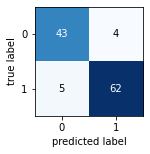

In [10]:
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
cm = confusion_matrix(y_test, y_pred)
a, b = plot_confusion_matrix(conf_mat=cm, figsize=(2, 2))

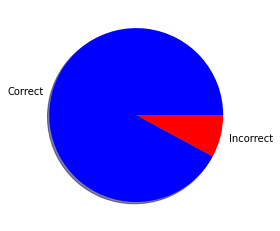

In [11]:
sizes = np.array([cm[0][0]+cm[1][1], cm[0][1]+cm[1][0]])
labels = 'Correct', 'Incorrect'
colours = ['blue', 'red']

plt.pie(sizes, labels=labels, colors=colours, shadow=True)
plt.show()